In [1]:
import csv
import numpy as np
import BasicFunctionJupter as BF

## 读取Reco_Dataset_Cell得到映射矩阵 
with open("..\\..\\Data\\Reco_Dataset_Cell.csv", "r") as f:
    reader = csv.reader(f)
    data=np.array(list(reader))
region_list=[]
projection_list=[]
for i in data:
    region_list.append(str(i[0]))
    projection_list.append(str(i[1])+'_'+str(i[2]))
region_list=list(set(region_list))
projection_list=list(set(projection_list))

projection_list1=BF.getregionname(projection_list,'side1')
region_list1=BF.getregionname(region_list,1)

## 构建反转矩阵
region_list2=[]
projection_list2=[]
for i in range(0,len(region_list1)):
    region_list2.append(region_list1[i]+'_Con')
    region_list1[i]=region_list1[i]+'_Ips'
for x in projection_list1:
    if 'Con' in x:
        projection_list2.append(x.replace('Con','Ips'))
    else:
        projection_list2.append(x.replace('Ips','Con'))

region_list=region_list1+region_list2 #soma区域列表
projection_list=list(set(projection_list1+projection_list2)) # 投射区域列表

relation_matrix=np.load('..\Save_Data\connection_matrix.npy')

region_list.sort()
projection_list.sort()



In [2]:
## 全脑连接图可视化
## igraph 画图
import igraph as ig
import cairo
import cv2
import math
g = ig.Graph(directed=True)
edge_list=[]
edge_weight=[]
edge_color=[]
node_list=[]
node_color=[]
for i in range(0,len(region_list)):
    for j in range(0,len(projection_list)):
        if relation_matrix[i,j]>1:
            if region_list[i] not in node_list:
                node_list.append(region_list[i])
                node_color.append(BF.randomcolor())
            if projection_list[j] not in node_list:
                node_list.append(projection_list[j])
                node_color.append(BF.randomcolor())
            edge_list.append((region_list[i],projection_list[j]))
            edge_color.append(node_color[node_list.index(region_list[i])])
            edge_weight.append(relation_matrix[i,j])
g.add_vertices(node_list)
g.add_edges(edge_list)

g.es['weight']=edge_weight
g.es['color']=edge_color
g.es['arrow_size']=0.3

g.vs['color'] = node_color
g.vs['label'] = node_list
g.vs['size']=10
g.vs['label_size']=10
layout=g.layout("large_graph")
'''
g.simplify()
ig.plot(g,layout=layout)
'''

'\ng.simplify()\nig.plot(g,layout=layout)\n'

In [3]:
'''
## 构建其他矩阵
relation_matrix_single=np.load('.\Save_Data\connection_matrix_single.npy')
g_s = ig.Graph(directed=True)
node_list_s=[]
edge_list_s=[]
edge_weight_s=[]
for i in range(0,len(region_list)):
    for j in range(0,len(projection_list)):
        if relation_matrix_single[i,j]>0.000001:
            if region_list[i] not in node_list_s:
                node_list_s.append(region_list[i])
            if projection_list[j] not in node_list_s:
                node_list_s.append(projection_list[j])
            edge_list_s.append((region_list[i],projection_list[j]))
            edge_weight_s.append(relation_matrix_single[i,j])
g_s.add_vertices(node_list_s)
g_s.add_edges(edge_list_s)

relation_matrix_middle=np.load('.\Save_Data\connection_matrix_allen.npy')
g_m = ig.Graph(directed=True)
node_list_m=[]
edge_list_m=[]
edge_weight_m=[]
for i in range(0,len(region_list)):
    for j in range(0,len(projection_list)):
        if relation_matrix_middle[i,j]>0.000001:
            if region_list[i] not in node_list_m:
                node_list_m.append(region_list[i])
            if projection_list[j] not in node_list_m:
                node_list_m.append(projection_list[j])
            edge_list_m.append((region_list[i],projection_list[j]))
            edge_weight_m.append(relation_matrix_middle[i,j])
g_m.add_vertices(node_list_m)
g_m.add_edges(edge_list_m)
'''


"\n## 构建其他矩阵\nrelation_matrix_single=np.load('.\\Save_Data\\connection_matrix_single.npy')\ng_s = ig.Graph(directed=True)\nnode_list_s=[]\nedge_list_s=[]\nedge_weight_s=[]\nfor i in range(0,len(region_list)):\n    for j in range(0,len(projection_list)):\n        if relation_matrix_single[i,j]>0.000001:\n            if region_list[i] not in node_list_s:\n                node_list_s.append(region_list[i])\n            if projection_list[j] not in node_list_s:\n                node_list_s.append(projection_list[j])\n            edge_list_s.append((region_list[i],projection_list[j]))\n            edge_weight_s.append(relation_matrix_single[i,j])\ng_s.add_vertices(node_list_s)\ng_s.add_edges(edge_list_s)\n\nrelation_matrix_middle=np.load('.\\Save_Data\\connection_matrix_allen.npy')\ng_m = ig.Graph(directed=True)\nnode_list_m=[]\nedge_list_m=[]\nedge_weight_m=[]\nfor i in range(0,len(region_list)):\n    for j in range(0,len(projection_list)):\n        if relation_matrix_middle[i,j]>0.000001:

DR_Ips
MB_Con
IGL_Ips
RH_Con
SSp-un_Con
VISa_Ips


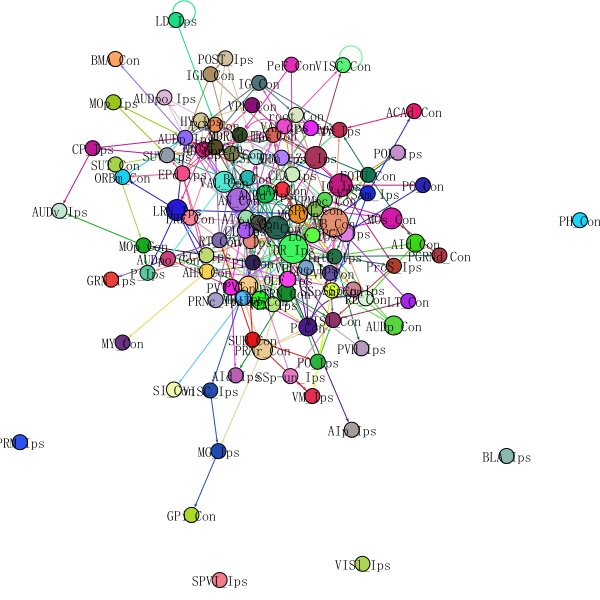

In [4]:
import matplotlib.pyplot as plt
## 网络分析，参考https://kateto.net/netscix2016.html

# Hubs, centrality and robustness
g_hub = ig.Graph(directed=True)
g_hub.add_vertices(node_list)
g_hub.add_edges(edge_list)

g_hub.es['weight']=edge_weight
g_hub.es['color']=edge_color
g_hub.es['arrow_size']=0.3

g_hub.vs['color'] = node_color
g_hub.vs['label'] = node_list

g_hub.es['weight']=edge_weight

authority_score=g_hub.authority_score()
hub_score=g_hub.hub_score()
size_temp=[]
for x in range(0,len(hub_score)):
    if hub_score[x] < 0.5:
        size_temp.append(15)
    else:
        size_temp.append(np.floor(hub_score[x]*30))
        if hub_score[x]>0.8:
            print(node_list[x])
g_hub.vs['size']=size_temp
# 删除只有入度or出度的节点
t1=g_hub.indegree()
t2=g.outdegree()
for k in range(len(t1)-1,-1,-1):
    if t1[k]==0 or t2[k]==0:
        g_hub.delete_vertices(k)
        
layout=g_hub.layout("fr")
# g_hub.simplify()
ig.plot(g_hub,layout=layout)



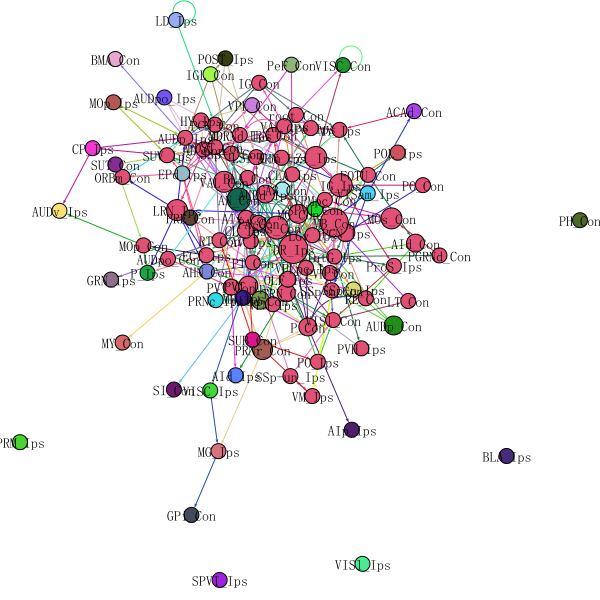

In [5]:
## 聚类分析
## cluster
clu_result=g_hub.clusters()
#c=g_s.community_edge_betweenness(weights=edge_weight_s)
temp_color={}  
for x in list(set(clu_result.membership)):
    if x not in temp_color.keys():
        temp_color[x]=BF.randomcolor()
color_list=[]
for x in clu_result.membership:
    color_list.append(temp_color[x])
g_hub.vs['color'] = color_list
ig.plot(g_hub,layout=layout)

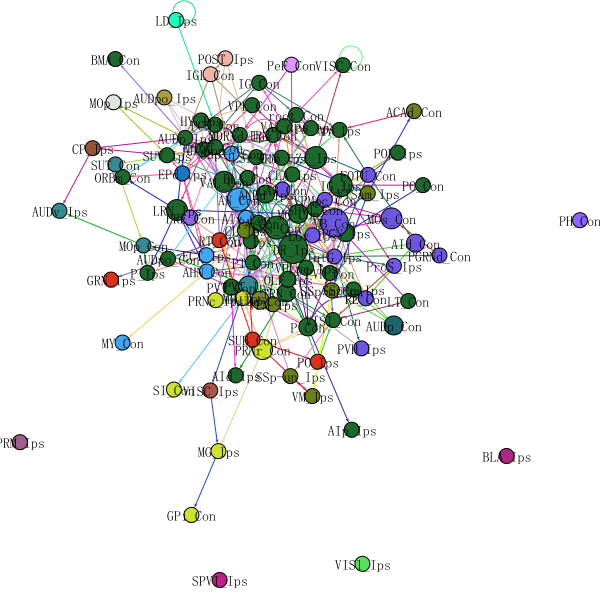

In [6]:
# 社区检测
# community_edge_betweenness
# community_label_propagation
# community_fastgreedy
community_test=g_hub.community_label_propagation(weights=g_hub.es['weight'])
temp_color={}  
for x in list(set(community_test.membership)):
    if x not in temp_color.keys():
        temp_color[x]=BF.randomcolor()
color_list=[]
for x in community_test.membership:
    color_list.append(temp_color[x])
g_hub.vs['color'] = color_list

ig.plot(g_hub,layout=layout)

In [8]:
community_test=g_hub.community_edge_betweenness(weights=g_hub.es['weight'])
community_test._plot_item()

TypeError: _plot_item() missing 5 required positional arguments: 'context', 'horiz', 'idx', 'x', and 'y'